In [1]:
# Import necessary packages
import sys 
import numpy as np
import pandas as pd
import statsmodels as sm
import sklearn
import scipy as sp
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_sub = pd.read_pickle('subscribers')
df_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [4]:
df_sub['age'].max()

81720000.0

In [5]:
df_csr = pd.read_pickle('customer_service_reps')
df_csr

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [6]:
df_eng = pd.read_pickle('engagement')
df_eng

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [7]:
df_eng.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
count,2.585724e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.585724e+06
mean,2.499102e+07,2.247702e+00,3.896170e-01,2.794718e+00,4.394189e+00,5.889939e-02,6.860515e-01,6.747735e-01
std,2.891154e+06,2.433315e+00,8.061742e-01,2.212746e+00,1.453039e+00,2.800921e-01,4.643331e-01,7.088157e-01
min,2.000006e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.248173e+07,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.498278e+07,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.750345e+07,3.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.999994e+07,1.380000e+02,3.900000e+01,2.400000e+01,3.200000e+01,1.200000e+01,9.000000e+00,3.000000e+00


In [8]:
df_eng.shape

(2585724, 9)

# Customer Segmentaion

In [9]:
df_eng1 = df_eng.drop(columns = ['subid','date'])

In [10]:
from sklearn.preprocessing import StandardScaler as st
eng_normalized=st().fit(df_eng1).transform(df_eng1)
eng_s=pd.DataFrame(eng_normalized)
eng_s

,0,1,2,3,4,5,6
0,-0.512758,0.757136,-1.263009,1.105140,-0.210286,-1.477499,-0.951973
1,-0.512758,-0.483291,-1.263009,0.416927,-0.210286,-1.477499,-0.951973
2,-0.923720,0.757136,-1.263009,-3.024138,-0.210286,-1.477499,-0.951973
3,-0.512758,-0.483291,1.900482,1.793353,-0.210286,-1.477499,-0.951973
4,-0.101796,0.757136,1.900482,1.793353,-0.210286,0.676128,-0.951973
...,...,...,...,...,...,...,...
2585719,-0.101796,-0.483291,0.544700,-0.271286,-0.210286,0.676128,0.458831
2585720,-0.101796,-0.483291,0.544700,-0.271286,-0.210286,0.676128,0.458831
2585721,-0.923720,-0.483291,0.544700,-0.271286,-0.210286,0.676128,0.458831
2585722,-0.512758,-0.483291,0.092773,-0.271286,3.359969,0.676128,0.458831


In [11]:
eng_s.dropna(inplace=True)

In [12]:
print(np.isnan(eng_s).any())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool


In [13]:
eng_s.shape

(2551113, 7)

In [14]:
df_eng.dropna(inplace=True)

In [15]:
df_eng.shape

(2551113, 9)

In [16]:
#Train k-means model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=666, max_iter=1000,init='k-means++').fit(eng_s)
print(kmeans.labels_)

##For a new data point of a moview, predict which cluster it belongs to.
print(kmeans.predict([[0,1,0,0,0,1,1]]))

##The center of each cluster
print(kmeans.cluster_centers_)


[4 4 3 ... 1 0 1]
[1]
[[ 0.19582908  0.11685945  0.52313083  0.04862269  4.02240616  0.52551861
   0.56109745]
 [ 0.10995464 -0.29364201 -0.07950967 -0.10482949 -0.21028581  0.67144533
   0.60052235]
 [ 0.22071911  0.44610498  0.83782724  0.55830352 -0.21025526  0.456143
  -0.83869584]
 [-0.58825341 -0.21671588 -1.26187793 -3.01910676 -0.20104159 -1.37902348
  -0.06930742]
 [-0.38168945 -0.15059067 -0.87103747  0.15411389 -0.21028581 -1.47749904
  -0.0431779 ]]


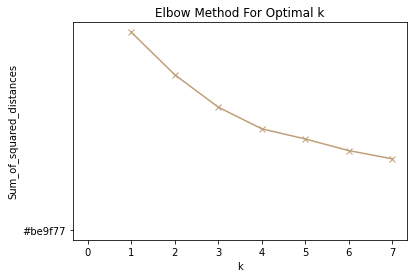

In [58]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,8)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-','#be9f77',color='#be9f77')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(eng_s)

In [18]:
kmeans = KMeans(n_clusters=4, random_state=666, max_iter=1000,init='k-means++').fit(eng_s)
clust = kmeans.fit_predict(eng_s)
eng_s['cluster'] = clust
print(kmeans.labels_)

[1 1 1 ... 2 3 2]


In [19]:
eng_s.head()

,0,1,2,3,4,5,6,cluster
0,-0.512758,0.757136,-1.263009,1.105140,-0.210286,-1.477499,-0.951973,1
1,-0.512758,-0.483291,-1.263009,0.416927,-0.210286,-1.477499,-0.951973,1
2,-0.923720,0.757136,-1.263009,-3.024138,-0.210286,-1.477499,-0.951973,1
3,-0.512758,-0.483291,1.900482,1.793353,-0.210286,-1.477499,-0.951973,0
4,-0.101796,0.757136,1.900482,1.793353,-0.210286,0.676128,-0.951973,0


In [20]:
df_eng['cluster'] = clust
df_eng.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,1
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,1
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0,0


In [21]:
seg1 = df_eng.loc[df_eng['cluster']==0]
seg2 = df_eng.loc[df_eng['cluster']==1]
seg3 = df_eng.loc[df_eng['cluster']==2]
seg4 = df_eng.loc[df_eng['cluster']==3]
seg4

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
999,26753247,2019-07-19,1.0,0.0,6.0,6.0,1.0,1.0,0.0,3
1008,26753247,2019-07-21,1.0,0.0,5.0,5.0,1.0,1.0,1.0,3
1056,26753247,2019-08-02,2.0,0.0,5.0,5.0,1.0,1.0,1.0,3
1201,26105646,2019-07-24,1.0,0.0,5.0,5.0,1.0,1.0,1.0,3
1702,23364760,2019-07-25,1.0,0.0,5.0,6.0,1.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
28831557,25805185,2020-03-19,1.0,0.0,4.0,4.0,2.0,1.0,1.0,3
28831561,25805185,2020-03-21,1.0,0.0,1.0,4.0,1.0,0.0,1.0,3
28831879,24079030,2020-04-01,11.0,1.0,4.0,4.0,1.0,1.0,1.0,3
28832313,28409777,2020-04-20,4.0,0.0,3.0,4.0,1.0,1.0,1.0,3


In [22]:
print(seg1.shape)
print(seg2.shape)
print(seg3.shape)
print(seg4.shape)

(853647, 10)
(669089, 10)
(901585, 10)
(126792, 10)


In [ ]:
pca = decomposition.PCA(n=components=2)
x = pca.fit_transform(smap)

In [59]:
seg1.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
count,8.536470e+05,853647.000000,853647.000000,853647.000000,853647.000000,853647.000000,853647.000000,853647.000000,853647.0
mean,2.499403e+07,2.711055,0.750475,4.589035,5.249711,0.000008,0.858610,0.080299,0.0
std,2.891513e+06,2.856960,1.100207,1.367855,1.219647,0.002864,0.349031,0.276253,0.0
min,2.000006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.248509e+07,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.0
50%,2.498996e+07,2.000000,0.000000,5.000000,5.000000,0.000000,1.000000,0.000000,0.0
75%,2.751167e+07,4.000000,1.000000,5.000000,6.000000,0.000000,1.000000,0.000000,0.0
max,2.999994e+07,128.000000,39.000000,24.000000,32.000000,1.000000,4.000000,3.000000,0.0


In [60]:
seg2.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
count,6.690890e+05,669089.000000,669089.000000,669089.000000,669089.000000,669089.000000,669089.000000,669089.000000,669089.0
mean,2.499468e+07,1.184261,0.230917,0.536256,3.525314,0.000009,0.003494,0.662109,1.0
std,2.886696e+06,1.094277,0.538065,1.258301,1.958850,0.002995,0.059009,0.664192,0.0
min,2.000006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.250368e+07,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.0
50%,2.498682e+07,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.0
75%,2.749810e+07,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,1.0
max,2.999994e+07,14.000000,9.000000,5.000000,10.000000,1.000000,1.000000,3.000000,1.0


In [61]:
seg3.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
count,9.015850e+05,901585.000000,901585.00000,901585.000000,901585.000000,901585.0,901585.000000,901585.000000,901585.0
mean,2.498853e+07,2.532262,0.15254,2.610765,4.220941,0.0,0.995292,1.101812,2.0
std,2.895447e+06,2.382877,0.40869,1.904470,0.575530,0.0,0.069962,0.520708,0.0
min,2.000068e+07,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,2.0
25%,2.246484e+07,1.000000,0.00000,0.000000,4.000000,0.0,1.000000,1.000000,2.0
50%,2.498367e+07,2.000000,0.00000,4.000000,4.000000,0.0,1.000000,1.000000,2.0
75%,2.750760e+07,3.000000,0.00000,4.000000,4.000000,0.0,1.000000,1.000000,2.0
max,2.999994e+07,61.000000,6.00000,8.000000,15.000000,0.0,9.000000,3.000000,2.0


In [62]:
seg4.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,cluster
count,1.267920e+05,126792.000000,126792.000000,126792.000000,126792.000000,126792.000000,126792.000000,126792.000000,126792.0
mean,2.498911e+07,2.716528,0.483343,3.940272,4.451282,1.184980,0.927243,1.072710,3.0
std,2.880573e+06,3.045813,0.890796,1.275192,0.856436,0.493967,0.259920,0.406398,0.0
min,2.000080e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.0
25%,2.249416e+07,1.000000,0.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.0
50%,2.495418e+07,1.000000,0.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.0
75%,2.748193e+07,4.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,3.0
max,2.999989e+07,138.000000,18.000000,12.000000,15.000000,12.000000,3.000000,3.000000,3.0


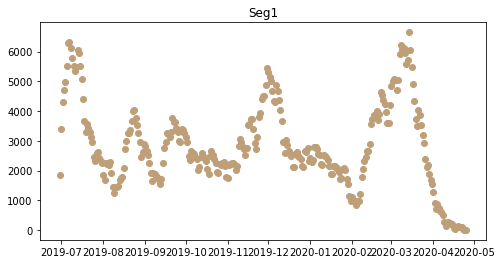

In [53]:
plt.figure(figsize=(8,4))
pd.plotting.register_matplotlib_converters()
x=seg1['date'].value_counts().index
y=seg1['date'].value_counts()

plt.title('Seg1')
plt.scatter(x,y,color='#be9f77')
plt.show()

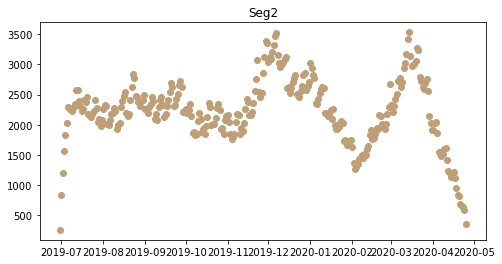

In [54]:
plt.figure(figsize=(8,4))
pd.plotting.register_matplotlib_converters()
x=seg2['date'].value_counts().index
y=seg2['date'].value_counts()

plt.title('Seg2')
plt.scatter(x,y,color='#be9f77')
plt.show()

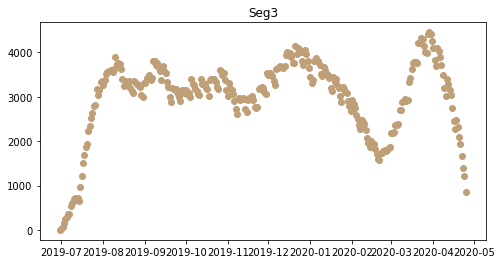

In [55]:
plt.figure(figsize=(8,4))
pd.plotting.register_matplotlib_converters()
x=seg3['date'].value_counts().index
y=seg3['date'].value_counts()

plt.title('Seg3')
plt.scatter(x,y,color='#be9f77')
plt.show()

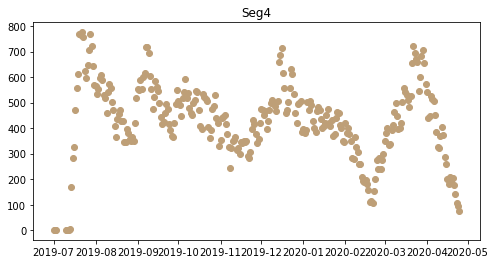

In [56]:
plt.figure(figsize=(8,4))
pd.plotting.register_matplotlib_converters()
x=seg4['date'].value_counts().index
y=seg4['date'].value_counts()

plt.title('Seg4')
plt.scatter(x,y,color='#be9f77')
plt.show()

# Advertising Channel Spend

In [31]:
channel_spend = pd.read_csv('channel_spend_graduate.csv')
channel_spend

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [32]:
sub_c = df_sub[df_sub['age']<100]
sub_c

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN


In [33]:
channel_date = sub_c[['subid','attribution_technical','account_creation_date']]
channel_date 

,subid,attribution_technical,account_creation_date
380374,23383224,facebook,2020-03-01 15:44:35
496617,26844789,organic,2019-12-07 16:37:06
356799,29417030,search,2020-01-27 16:09:32
681701,26723159,discovery,2019-10-05 12:57:07
284782,24810928,bing,2020-03-03 20:15:43
...,...,...,...
603751,25835684,email,2020-01-01 22:43:56
509326,21434712,facebook,2019-11-17 14:12:33
229587,25843074,google_organic,2019-12-06 18:02:13
281340,24799085,facebook,2019-12-21 19:40:44


In [34]:
year=channel_date['account_creation_date'].dt.year.tolist()
month=channel_date['account_creation_date'].dt.month.tolist()

In [35]:
str(year[0])+'0'+str(month[0])

'202003'

In [36]:
yearmonth=[]
for i in range(len(month)):
    if month[i] == 10 or  month[i] == 11 or month[i] == 12 :
        a = str(year[i])+ str(month[i])
    else:
        a =  str(year[i])+'0'+str(month[i])
    yearmonth.append(a)
print(yearmonth)

['202003', '201912', '202001', '201910', '202003', '202002', '202003', '202002', '202001', '201907', '201912', '201909', '201908', '201907', '201910', '201910', '202001', '201907', '201911', '202003', '202003', '201907', '202003', '202003', '202003', '201912', '202001', '201911', '201908', '201908', '202002', '201910', '202002', '201907', '201911', '201912', '201912', '201907', '201910', '202003', '202001', '201908', '202002', '202003', '202003', '201908', '202001', '201908', '202001', '201909', '202003', '201908', '201909', '202001', '202003', '201912', '201907', '201908', '202001', '201911', '201910', '201907', '202001', '202002', '201912', '201911', '202003', '202001', '202002', '202001', '202003', '202003', '202003', '202002', '202002', '201908', '201910', '201907', '201907', '202003', '201910', '202003', '202001', '202002', '202002', '201909', '201907', '201907', '201907', '201907', '202001', '201907', '201911', '202002', '201911', '202003', '201909', '202001', '201912', '202003',

In [37]:
channel_date['date'] = yearmonth
channel_date

<ipython-input-37-bcf37fd36c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_date['date'] = yearmonth


,subid,attribution_technical,account_creation_date,date
380374,23383224,facebook,2020-03-01 15:44:35,202003
496617,26844789,organic,2019-12-07 16:37:06,201912
356799,29417030,search,2020-01-27 16:09:32,202001
681701,26723159,discovery,2019-10-05 12:57:07,201910
284782,24810928,bing,2020-03-03 20:15:43,202003
...,...,...,...,...
603751,25835684,email,2020-01-01 22:43:56,202001
509326,21434712,facebook,2019-11-17 14:12:33,201911
229587,25843074,google_organic,2019-12-06 18:02:13,201912
281340,24799085,facebook,2019-12-21 19:40:44,201912


In [38]:
channel_date.drop(columns=['account_creation_date'])

,subid,attribution_technical,date
380374,23383224,facebook,202003
496617,26844789,organic,201912
356799,29417030,search,202001
681701,26723159,discovery,201910
284782,24810928,bing,202003
...,...,...,...
603751,25835684,email,202001
509326,21434712,facebook,201911
229587,25843074,google_organic,201912
281340,24799085,facebook,201912


In [39]:
channel_date

,subid,attribution_technical,account_creation_date,date
380374,23383224,facebook,2020-03-01 15:44:35,202003
496617,26844789,organic,2019-12-07 16:37:06,201912
356799,29417030,search,2020-01-27 16:09:32,202001
681701,26723159,discovery,2019-10-05 12:57:07,201910
284782,24810928,bing,2020-03-03 20:15:43,202003
...,...,...,...,...
603751,25835684,email,2020-01-01 22:43:56,202001
509326,21434712,facebook,2019-11-17 14:12:33,201911
229587,25843074,google_organic,2019-12-06 18:02:13,201912
281340,24799085,facebook,2019-12-21 19:40:44,201912


In [40]:
channel_date['attribution_technical'].value_counts()

facebook                   62811
search                     22080
email                      21110
organic                    18685
brand sem intent google    15821
google_organic              9553
affiliate                   9318
email_blast                 6321
pinterest                   5634
referral                    4005
facebook_organic            2979
discovery                   2525
brand sem intent bing       2173
other                       1777
display                     1392
bing                        1136
internal                    1109
podcast                      926
youtube                      906
bing_organic                 368
vod                          295
ott                          157
direct_mail                  138
quora                        100
samsung                       85
criteo                        44
appstore                      44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [41]:
channel_date_s = channel_date[channel_date['attribution_technical'].isin(['bing','display','facebook','search','youtube'])]

In [42]:
channel_date_s['attribution_technical'].value_counts()

facebook    62811
search      22080
display      1392
bing         1136
youtube       906
Name: attribution_technical, dtype: int64

In [43]:
num = pd.DataFrame(channel_date_s[['date','attribution_technical','subid']].groupby(['date','attribution_technical']).count())
num

subid
date   attribution_technical       
201906 bing                       7
       display                    3
       facebook                1304
       search                   106
       youtube                    1
201907 bing                     119
       display                   43
       facebook                9898
       search                  1316
       youtube                    8
201908 bing                      70
       display                   73
       facebook                7923
       search                  1715
       youtube                   15
201909 bing                      84
       display                   12
       facebook                4513
       search                  1588
       youtube                    2
201910 bing                      86
       display                   50
       facebook                7121
       search                  2005
       youtube                   11
201911 bing                     101
       display                   89
       facebook                9502
       search                  2127
       youtube                   47
201912 bing                      28
       display                  112
       facebook                6807
       search                  3247
       youtube                   75
202001 bing                     171
       display                  527
       facebook                4616
       search                  3501
       youtube                  365
202002 bing                     298
       display                  338
       facebook                6049
       search                  3779
       youtube                  204
202003 bing                     172
       display                  145
       facebook                5078
       search                  2696
       youtube                  178

In [44]:
spend = pd.DataFrame(channel_spend[['date','channel','spend_AED']].groupby(['date','channel']).sum())
spend

spend_AED
date   channel            
201907 bing            400
       display          12
       facebook       9000
       search        13000
       youtube          90
201908 bing            900
       display          20
       facebook      13000
       search        18500
       youtube         180
201909 bing           1000
       display          13
       facebook      10500
       search        19000
       youtube         100
201910 bing           1100
       display          19
       facebook      17000
       search        24000
       youtube         130
201911 bing           1300
       display          29
       facebook      23000
       search        25000
       youtube         550
201912 bing            300
       display          31
       facebook      16000
       search        38000
       youtube         900
202001 bing           2100
       display         148
       facebook      11000
       search        41000
       youtube        4360
202002 bing           3700
       display          94
       facebook      14000
       search        44000
       youtube        2420

In [45]:
channel_spend.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
